# Numerical Analysis

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def myplot(x,y):
    '''
    Quick plot
    x, y type: numpy array
    '''
    #plot range
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)

    ax.grid(True) #set grid
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin-np.fabs(ymin*0.2),ymax+np.fabs(ymax*0.2))
    ax.plot(x,y,'r-',x,x*0,'b-') #plot f and y=0

### My square root

In [6]:
def mysqrt(a):
    '''
    Returns square root of a
    Using newtonian method
    '''
    x2 = 1 #x_n+1 initially any float value greater than x1+error
    x1 = 0 #x_n initial point
    error = 1e-10 #target error
    
    #Newtonian method for x^2-a =0
    while np.fabs(x2-x1)>=error:
        x1 = x2
        x2 = (x1+a/x1)/2
        
    return x2
    

In [7]:
print(mysqrt(2))

1.414213562373095


   <font size=5>
   $x = \sqrt{a}$ 의 해를 구하고 싶음<br>
   $x_2 = \left( x_1 + \frac{a}{x_1} \right) /2$<br>
   $\Rightarrow 2x_2 *x_1 - x_1^2 = a$ <br>
   $x_1 \rightarrow x_2$ 일때 답에 가까워짐
   </font>

### Newtonian algorithm

In [8]:
#example function
def myftn(x):
    return (x+4)*(x+2)*(x-2)

#derivative of function
def dmyftn(x):
    dx = 1e-10
    return (myftn(x+dx)-myftn(x))/dx

In [9]:
#data
x = np.arange(-5,10,0.1) #domain
y = myftn(x) #range

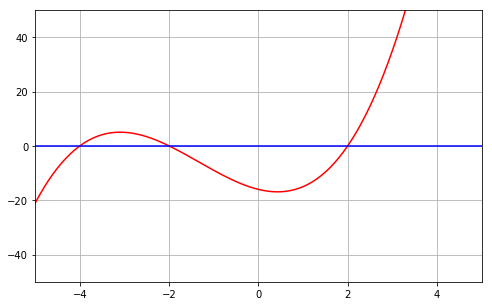

In [10]:
#plot

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-50,50)
ax.plot(x,y,'r-',x,x*0,'b-')


<font size = 5>
$x_1$ 에서 접선의 방정식
$ y = ax + b$<br>
$ a = f'(x_1)$<br>
$b = f(x_1) - a x_1$<br>
</font>

In [11]:
# eq of line at x1
x1 = 3 #any initial value 나중에 -3일때 보기 
a = dmyftn(x1) #slp
b = myftn(x1) - dmyftn(x1)*x1
l1 = a*x + b


Text(2.75532,-10,'x2=-b/a=2.26')

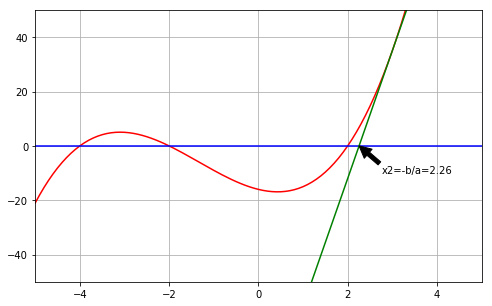

In [12]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-50,50)
ax.plot(x,y,'r-',x,x*0,'b-',x,l1,'g-')

ax.annotate('x2=-b/a={0:.2f}'.format(-b/a),xy =(-b/a,0),xytext=(-b/a+0.5,-10),arrowprops=dict(facecolor='black',shrink=0.0001))

In [13]:
# eq of line at x2
x1 = -b/a #any initial value
a = dmyftn(x1) #slp
b = myftn(x1) - dmyftn(x1)*x1
l2 = a*x + b

Text(2.52338,-10,'x2=-b/a=2.02')

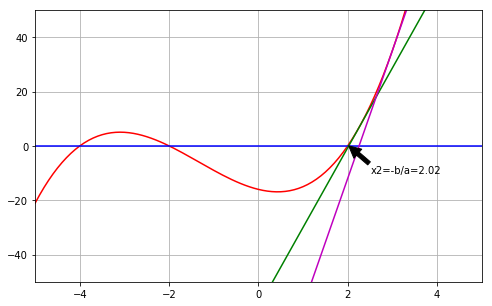

In [14]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-50,50)
ax.plot(x,y,'r-',x,x*0,'b-',x,l2,'g-',x,l1,'m-')

ax.annotate('x2=-b/a={0:.2f}'.format(-b/a),xy =(-b/a,0),xytext=(-b/a+0.5,-10),arrowprops=dict(facecolor='black',shrink=0.0001))

Text(2.50022,-10,'x2=-b/a=2.00')

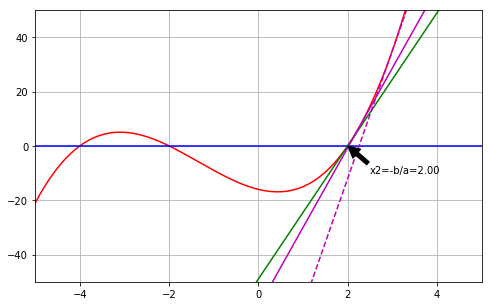

In [15]:
# eq of line at x3
x1 = -b/a #any initial value
a = dmyftn(x1) #slp
b = myftn(x1) - dmyftn(x1)*x1
l3 = a*x + b
#plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-50,50)
ax.plot(x,y,'r-',x,x*0,'b-',x,l3,'g-',x,l2,'m-',x,l1,'m--')

ax.annotate('x2=-b/a={0:.2f}'.format(-b/a),xy =(-b/a,0),xytext=(-b/a+0.5,-10),arrowprops=dict(facecolor='black',shrink=0.0001))

Alogrithm

In [16]:
#example function
def myftn(x):
    return (x+4)*(x+2)*(x-2)

def dmyftn(x):
    dx = 1e-10
    return (myftn(x+dx)-myftn(x))/dx

In [18]:
def Newton(x):
    error = 1e-10 #target error
    xt = 100 #any value xt-x > error
    
    while np.fabs(xt-x)>=error:
        xt=x
        a = dmyftn(xt)
        b = myftn(xt) - dmyftn(xt)*xt
        #if a == 0 처리해주면 좋음 
        x = -b/a
        
    return x

In [19]:
print(Newton(3))
print(Newton(-5))

2.0
-4.0


In [21]:
#initialize
ans = []
inp = 0
#find all root
for i in range(-10,10):
    temp = Newton(i)
    if temp not in ans:
        ans.append(temp)
#print(ans)
ans.sort() #답이 항상 순서대로 나오지 않는다
print(ans)


[-4.0, -2.0, 2.0]


### mysqrt revisited

In [22]:
def mysqrt(a):
    '''
    Returns square root of a
    Using newtonian method
    '''
    x2 = 1 #x_n+1 initially any float value greater than x1+error
    x1 = 0 #x_n initial point
    error = 1e-10 #target error
    
    #Newtonian method for x^2-a =0
    while np.fabs(x2-x1)>=error:
        x1 = x2
        x2 = (x1+a/x1)/2
        
    return x2

In [23]:
#data
y2 = x**2 - 2

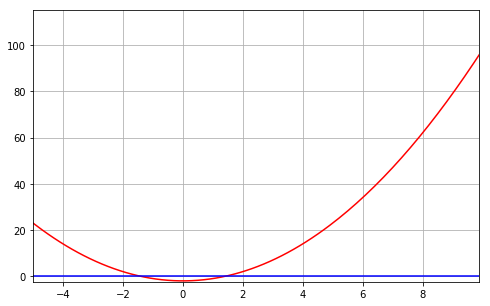

In [24]:
myplot(x,y2)

### Runge Kunta 4

<font size = 4>
    초기값을 알고 있는 미분방정식 문제<br>
    $y' = f(t,y)$,  $y(t_0) = y_0$ <br><br>
    $y_{n+1} = y_{n} + \frac{1}{6}(k_1 + 2k_2 + 2k_3 +k_4)dt$<br>
    $k_1 = f(t_n,y_n)\\
    k_2 = f\left( t_n + \frac{1}{2} dt, y_n + \frac{1}{2} k_1 dt \right) \\
    k_3 = f\left( t_n + \frac{1}{2} dt, y_n + \frac{1}{2} k_2 dt \right) \\
    k_4 = f\left( t_n + dt, y_n + k_1 dt \right)$<br><br>
    $k_1$ 만 사용하면 Euler method 가 된다
    </font>

In [30]:
#initialize
x = np.zeros(2)
v = np.zeros(2)
kx = np.zeros(4)
kv = np.zeros(4)
v0=0 #initial velocity
omega = 0.1 #angular velocity

dt = 0.1 #step size
T = np.arange(0,100,dt) #domain
conf = np.array([]) #range

x[0]=1 #initial position
v[0]=0

#equation of motion
def F(x):
    return -omega*x

#RK4
for i in T:
    
    kx[0] = v[0]
    kv[0] = F(x[0])
    
    kx[1] = v[0] + dt*kv[0]*0.5
    kv[1] = F(x[0] + dt*kx[0]*0.5)
    
    kx[2] = v[0] + dt*kv[1]*0.5
    kv[2] = F(x[0] + dt*kx[1]*0.5)
    
    kx[3] = v[0] + dt*kv[2]
    kv[3] = F(x[0] + dt*kx[2])
    
    px = dt*(kx[0]+2*kx[1]+2*kx[2]+kx[3])/6
    pv = dt*(kv[0]+2*kv[1]+2*kv[2]+kv[3])/6
    
    x[1] = x[0] + px
    v[1] = v[0] + pv
    
    conf = np.append(conf,x[1]) #save motion
    
    x[0] = x[1]
    v[0] = v[1]

    

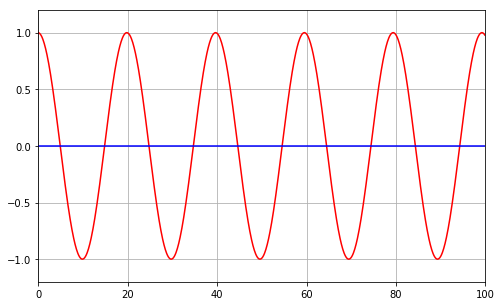

In [31]:
myplot(T,conf)

## 실습

1. n차 제곱근을 구하는 프로그램을 만들어 보기